In [1]:
# python version 3.6.9 #
import pandas as pd # 1.1.5
import numpy as np # 1.19.5
import matplotlib.pyplot as plt
import matplotlib # 3.3.4
import scipy.stats as st # scipy 1.5.4
import random
import seaborn as sns

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rc('text', usetex=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('source_data/included/figure.style')


MannwhitneyuResult(statistic=4.0, pvalue=0.0023641001034725665)
5.240032183085999
MannwhitneyuResult(statistic=0.0, pvalue=0.0006171359051429492)
121427.11209198812
MannwhitneyuResult(statistic=11.0, pvalue=0.41726581135546437)
1.185459940652819


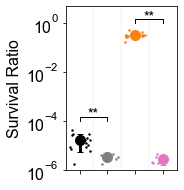

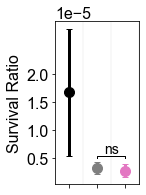

In [2]:
## fig 5A left panel
## subset table to Δlon-ΔsulA and comparison strains; only amp+cipro treatment
table = pd.read_csv('source_data/included/fig5_antibiotic_survival.csv',sep=',',index_col=1)
table = table.loc[table['overnight_length']<40]
table = table[['lag_survival','abx']]
table = table.loc[table['abx']=='amp+cipro']
samples = ['wt','Δlon-ΔsulA','metG*','metG*-Δlon-ΔsulA']
table = table.loc[samples].dropna()
cm = plt.cm.get_cmap('tab20')
colors = ['k',cm(14),cm(2),cm(12)]
fig,ax = plt.subplots(figsize=(2,3))
i=0
for s,c in zip(samples,colors):
    y = table.loc[table.index==s,'lag_survival']
    l = []
    [l.append(np.random.choice([-1, 1]) * random.uniform(0.2,0.4)) for i in range(0,len(y))]
    ax.scatter([x+y for x,y in zip([i]*len(y),l)],y,s=2,color=c)
    ax.errorbar(i,y.mean(),xerr=None,marker='.',markersize=20,yerr=y.std(),color=c,capsize=3)
    i+=1

for i in [0.5,1.5,2.5]:
    ax.axvline(i,color='grey',linewidth=0.2,alpha=0.5)
x1 = 0
x2 = 1
y = 10**(-4)
h = 0.00005
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.00005, "**", ha='center', va='bottom', color='k',size=14)

x1 = 2
x2 = 3
y = 1
h = 0.5
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.5, "**", ha='center', va='bottom', color='k',size=14)

    
ax.set_yscale('log')
ax.set_ylim(10**(-6),5)
ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels([])
ax.set_ylabel('Survival Ratio',size=16)

## check significance
s1 = 'wt'
s2 = 'Δlon-ΔsulA'
y1 = table.loc[table.index==s1,'lag_survival']
y2 = table.loc[table.index==s2,'lag_survival']
print(st.mannwhitneyu(y1,y2))
print(y1.mean()/y2.mean())

s1 = 'metG*'
s2 = 'metG*-Δlon-ΔsulA'
y1 = table.loc[table.index==s1,'lag_survival']
y2 = table.loc[table.index==s2,'lag_survival']
print(st.mannwhitneyu(y1,y2))
print(y1.mean()/y2.mean())

plt.savefig('figures/fig5a_left.pdf')

## fig 5A right panel

samples = ['wt','Δlon-ΔsulA','metG*-Δlon-ΔsulA']
colors = ['k',cm(14),cm(12)]
fig,ax = plt.subplots(figsize=(1.5,3))
i=0
for s,c in zip(samples,colors):
    y = table.loc[table.index==s,'lag_survival']
    ax.errorbar(i,y.mean(),xerr=None,marker='.',markersize=20,yerr=y.std(),color=c,capsize=3)
    i+=1

for i in [0.5,1.5,2.5]:
    ax.axvline(i,color='grey',linewidth=0.2,alpha=0.5)

x1 = 1
x2 = 2
y = 0.5*10**(-5)
h = 0.04*10**(-5)
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color='k',size=14)

ax.set_xlim(-0.5,2.5)
ax.set_xticks([0,1,2])
ax.set_xticklabels([])
ax.set_ylabel('Survival Ratio',size=16)

s1 = 'Δlon-ΔsulA'
s2 = 'metG*-Δlon-ΔsulA'
y1 = table.loc[table.index==s1,'lag_survival']
y2 = table.loc[table.index==s2,'lag_survival']
print(st.mannwhitneyu(y1,y2))
print(y1.mean()/y2.mean())

ax.set_yticks([10**-5*0.5,10**-5*1,10**-5*1.5,10**-5*2])
plt.savefig('figures/fig5a_right.pdf')


In [3]:
table.to_csv('source_data/source_tables/fig5a.csv')

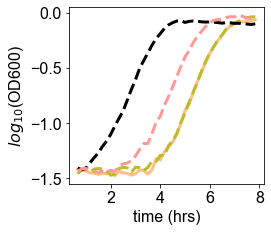

In [4]:
## fig 5B
table = pd.read_csv('source_data/included/fig5B_bortezomib_OD.csv',sep=',',index_col=0,header=[0,1,2])
table = table.loc[:,table.columns.sort_values()]
fig,ax = plt.subplots(figsize=(3.5,3.25))
min_t = 0.5
max_t = 8
table = table.loc[table.index<max_t]
table = table.loc[table.index>min_t]

x = table.index
y = table.loc[:,("DMSO", "DMSO")].mean(axis=1)
ax.plot(x,np.log10(y),color=cm(2),alpha=0.5,label='metG* + DMSO')

y = table.loc[:,("DMSO", "bortezomib")].mean(axis=1)
ax.plot(x,np.log10(y),color=cm(16),linestyle='--',label='metG* + lag bortezomib')

y = table.loc[:,("bortezomib", "DMSO")].mean(axis=1)
ax.plot(x,np.log10(y),color='k',linestyle='--',label='metG* + overnight bortezomib')

y = table.loc[:,("late_bortezomib","DMSO")].mean(axis=1)
ax.plot(x,np.log10(y),color=cm(7),linestyle='--',label='metG* + late overnight bortezomib')

ax.set_ylabel('$log_{10}$(OD600)')
ax.set_xlabel('time (hrs)')
plt.savefig('figures/fig5b.pdf')


In [5]:
all_df = pd.DataFrame()
for conditions,cols in zip(['no_bzmb','bzmb_3','bzmb_1','bzmb_2'],[("DMSO", "DMSO"),("DMSO", "bortezomib"),("bortezomib", "DMSO"),("late_bortezomib","DMSO")]):
    df = pd.DataFrame(table.loc[:,cols])
    df.columns = [conditions] * len(df.columns)
    all_df = all_df.merge(df,left_index=True,right_index=True,how='outer')
all_df.to_csv('source_data/source_tables/fig5b.csv')
    

In [6]:
## Mann-Whitney U tests on slopes and lag times

def compare_slopes_lags(samples):
    slopes = {}
    lags = {}
    start_OD = 0.1
    t_diff = 1.5
    for s in [0,1]:
        slopes[s] = []
        lags[s] = []
        y = table.loc[:,samples[s]]
        tmin = min(y.loc[y.mean(axis=1)>start_OD].index) # define start time as when cells reach OD 0.1
        tmax = tmin+t_diff
        for i in range(0,len(y.columns)):
            y_sub = y.iloc[:,i]
            lag = min(y_sub[y_sub>start_OD].index)
            y_sub = np.log10(y_sub.loc[(y_sub.index>tmin)&(y_sub.index<tmax)])
            x = y_sub.index
            slope, intercept, r, p, se = st.linregress(x, y_sub)
            slopes[s].append(slope)
            lags[s].append(lag)
    print('slopes:' + str(st.mannwhitneyu(slopes[0],slopes[1])))
    print('lags:' + str(st.mannwhitneyu(lags[0],lags[1])))
    
table = table.loc[:,(table.columns.get_level_values(2).str.contains('no_wash'))] # remove technical replicates

samples = [('DMSO','DMSO'),('DMSO','bortezomib')]
compare_slopes_lags(samples)

samples = [('DMSO','DMSO'),('late_bortezomib','DMSO')]
compare_slopes_lags(samples)

samples = [('DMSO','DMSO'),('bortezomib','DMSO')]
compare_slopes_lags(samples)

slopes:MannwhitneyuResult(statistic=2.0, pvalue=0.19136654444261297)
lags:MannwhitneyuResult(statistic=2.5, pvalue=0.25327758452452015)
slopes:MannwhitneyuResult(statistic=3.0, pvalue=0.3312602917700287)
lags:MannwhitneyuResult(statistic=0.0, pvalue=0.0318012848103768)
slopes:MannwhitneyuResult(statistic=4.0, pvalue=0.5)
lags:MannwhitneyuResult(statistic=0.0, pvalue=0.0318012848103768)


No handles with labels found to put in legend.


SpearmanrResult(correlation=0.10469740497143776, pvalue=0.7103869969641559)
SpearmanrResult(correlation=0.8927400391589727, pvalue=7.5459415053053945e-06)
MannwhitneyuResult(statistic=0.0, pvalue=0.0025374340489701264)
5.865504481241231


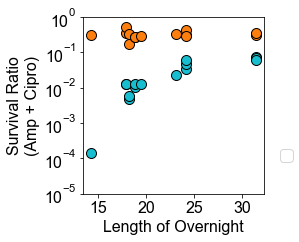

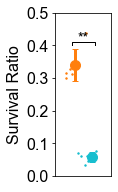

In [7]:
# fig 5C
cm = plt.cm.get_cmap('tab10')

table = pd.read_csv('source_data/included/fig5_antibiotic_survival.csv',sep=',',index_col=1)
table = table.loc[table['overnight_length']<40]
table = table[['lag_survival','abx','overnight_length']]
table = table.loc[table['abx']=='amp+cipro']
samples = ['metG*','metG*-ΔyqgE']
table = table.loc[samples].dropna()

fig,ax = plt.subplots(figsize=(3.25,3.25))
ax.scatter(table.loc['metG*','overnight_length'],table.loc['metG*','lag_survival'],color=cm(1),alpha=1,s=100,edgecolors='k')
ax.scatter(table.loc['metG*-ΔyqgE','overnight_length'],table.loc['metG*-ΔyqgE','lag_survival'],color=cm(9),alpha=1,s=100,edgecolors='k')
ax.set_yscale('log')
ax.set_ylim(10**(-5),1)
ax.set_yticks([10**-5,10**-4,10**-3,10**-2,10**-1,1])
ax.set_xticks([15,20,25,30])

ax.legend(bbox_to_anchor=(1.2, 0.3),fontsize=16)
ax.set_ylabel('Survival Ratio\n(Amp + Cipro)',size=16)
ax.set_xlabel('Length of Overnight',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.savefig('figures/fig5c_left.pdf')

x = table.loc['metG*','overnight_length']
y = table.loc['metG*','lag_survival']
print(st.spearmanr(x,y))

x = table.loc['metG*-ΔyqgE','overnight_length']
y = table.loc['metG*-ΔyqgE','lag_survival']
print(st.spearmanr(x,y))


## right side (statistics)
cm = plt.cm.get_cmap('tab10')

table = table.loc[table['overnight_length']>=24,]

fig,ax = plt.subplots(figsize=(1,3))
y1 = table.loc['metG*','lag_survival']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.5,0.1)) for i in range(0,len(y1))]
ax.scatter([x+y for x,y in zip([0.2]*len(y1),l)],y1,s=2,color=cm(1))
ax.errorbar(0.2,y1.mean(),xerr=None,marker='.',markersize=20,yerr=y1.std(),color=cm(1),capsize=3)

y2 = table.loc['metG*-ΔyqgE','lag_survival']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.5,0.1)) for i in range(0,len(y2))]
ax.scatter([x+y for x,y in zip([0.8]*len(y2),l)],y2,s=2,color=cm(9))
ax.errorbar(0.8,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color=cm(9),capsize=3)

ax.set_xlim(-0.5,1.5)
ax.set_ylim(0,0.5)
ax.set_xticks([])
ax.set_ylabel('Survival Ratio',size=16)
x1 = 0.1
x2 = 0.9
y = 0.4
h = 0.01
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.01, "**", ha='center', va='bottom', color='k',size=14)
plt.savefig('figures/fig5c_right.pdf')

print(st.mannwhitneyu(y1,y2))
print(y1.mean()/y2.mean())

In [8]:
table = pd.read_csv('source_data/included/fig5_antibiotic_survival.csv',sep=',',index_col=1)
table = table.loc[table['overnight_length']<40]
table = table[['lag_survival','abx','overnight_length']]
table = table.loc[table['abx']=='amp+cipro']
samples = ['metG*','metG*-ΔyqgE']
table = table.loc[samples].dropna()
table.sort_values(['strain','overnight_length']).to_csv('source_data/source_tables/fig5c.csv')

stats for means: metG*-pRFP+ vs metG*-pYqgE+; metG*-ΔyqgE-pRFP+ vs metG*-ΔyqgE-pYqgE+
MannwhitneyuResult(statistic=28.0, pvalue=0.4353310227367356)
MannwhitneyuResult(statistic=0.0, pvalue=0.0010825146665191896)
stats for means: wt-pRFP+ vs wt-pYqgE+; metG*-pRFP+ vs metG*-ΔyqgE-pRFP+
MannwhitneyuResult(statistic=0.0, pvalue=0.015191410988288745)
MannwhitneyuResult(statistic=0.0, pvalue=0.001680669737382513)
stats for means: wt-pRFP+ vs metG*-ΔyqgE-pRFP+
MannwhitneyuResult(statistic=0.0, pvalue=0.005366708051498597)
stats for range: metG*-pRFP+ vs metG*-pYqgE+; metG*-ΔyqgE-pRFP+ vs metG*-ΔyqgE-pYqgE+
MannwhitneyuResult(statistic=5.0, pvalue=0.003914529970299702)
MannwhitneyuResult(statistic=0.0, pvalue=0.0010582808012852927)
stats for range: wt-pRFP+ vs wt-pYqgE+; metG*-pRFP+ vs metG*-ΔyqgE-pRFP+
MannwhitneyuResult(statistic=0.0, pvalue=0.010535285067189329)
MannwhitneyuResult(statistic=0.0, pvalue=0.0016372792169341462)
stats for range: wt-pRFP+ vs metG*-ΔyqgE-pRFP+
MannwhitneyuResult(

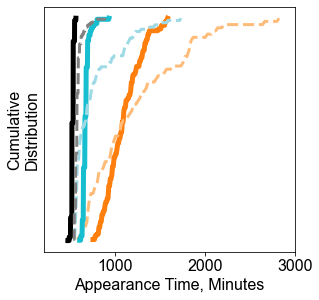

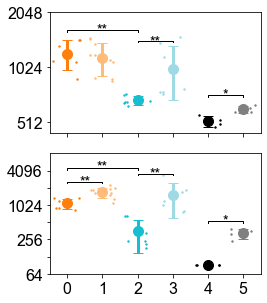

In [9]:
## fig 5D
## left panel
samples = {}
samples['metG*-ΔyqgE-pYqgE+'] = ['MG1655-metG*-ΔyqgE-pyqgE-yqgE_20230130','MG1655-metG*-ΔyqgE-p-yqgE1_20221002','MG1655-metG*-ΔyqgE-p-yqgE2_20221002','MG1655-metG*-ΔyqgE-p-yqgE_20220922','ΔyqgE-yqgE+-1_20230216','ΔyqgE-yqgE+-2_20230216','ΔyqgE-yqgE+-3_20230216']
samples['metG*-ΔyqgE-pRFP+'] = ['MG1655-metG*-ΔyqgE-pyqgE-RFP_20230130','metG*-∆yqgE-RFP+-2_20230209','metG*-∆yqgE-RFP+-1_20230209','ΔyqgE-RFP+-1_20230216','ΔyqgE-RFP+-2_20230216','ΔyqgE-RFP+-3_20230216','ΔyqgE-RFP+-4_20230216'] 
samples['metG*-pYqgE+'] = ['MG1655-metG*-pyqgE-yqgE_20230130','metG*-yqgE1_20221011','metG*-yqgE2_20221011','metG*-yqgE3_20221011','MG1655-metG*-p-yqgE1_20221002','MG1655-metG*-p-yqgE2_20221002','MG1655-metG*-p-yqgE_20220922','metG*-pYqgE+-1_20230303','metG*-pYqgE+-2_20230303','metG*-pYqgE+-3_20230303']
samples['metG*-pRFP+'] = ['MG1655-metG*-pyqgE-RFP_20230130','metG*-RFP+-2_20230209','metG*-RFP+-1_20230209','metG*-pRFP+-1_20230303','metG*-pRFP+-2_20230303','metG*-pRFP+-2_20230303']
samples['wt-pRFP+'] = ['wt-pRFP+-1_20230307','wt-pRFP+-2_20230307','wt-pRFP+-3_20230307','wt-pRFP+-4_20230307']
samples['wt-pYqgE+'] = ['wt-pYqgE+-1_20230307','wt-pYqgE+-2_20230307','wt-pYqgE+-3_20230307','wt-pYqgE+-4_20230307']

appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)

cm = plt.cm.get_cmap('tab20')
cols = ['k',cm(2),cm(3),cm(18),cm(19),'grey'] 

xmin = 200
xmax = 3000
alpha=1
fig, ax = plt.subplots(figsize=(4.5,4.5))
i=0

for t in [samples['wt-pRFP+'][1],'metG*-RFP+-1_20230209','metG*-yqgE1_20221011','ΔyqgE-RFP+-4_20230216',samples['metG*-ΔyqgE-pYqgE+'][1],samples['wt-pYqgE+'][1]]:
    data = appearance_times.loc[t,'appearance']
    #print(len(data))
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    if (i==0) | (i==1) | (i==3):
        ax.plot(bins_count[1:],cdf,linewidth=5,color=cols[i],alpha=alpha)
    else:
        ax.plot(bins_count[1:],cdf,linewidth=3,color=cols[i],alpha=alpha,linestyle='--')
    ax.set_yticks([])
    ax.set_xlim([xmin,xmax])
    i += 1
    
ax.set_ylabel('Cumulative\nDistribution',size=16)
ax.set_xlabel('Appearance Time, Minutes',size=16) 

plt.savefig('figures/fig5d_left.pdf')

## right panel
cm = plt.cm.get_cmap('tab20')

cols = [cm(2),cm(3),cm(18),cm(19),'k','grey'] 

def f(rep):
    return(appearance_times.loc[rep,'appearance'].mean())
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))

to_plot = ['metG*-pRFP+','metG*-pYqgE+','metG*-ΔyqgE-pRFP+','metG*-ΔyqgE-pYqgE+','wt-pRFP+','wt-pYqgE+']

print('stats for means: metG*-pRFP+ vs metG*-pYqgE+; metG*-ΔyqgE-pRFP+ vs metG*-ΔyqgE-pYqgE+')
print(st.mannwhitneyu(s_func['metG*-pRFP+'],s_func['metG*-pYqgE+']))
print(st.mannwhitneyu(s_func['metG*-ΔyqgE-pRFP+'],s_func['metG*-ΔyqgE-pYqgE+']))
print('stats for means: wt-pRFP+ vs wt-pYqgE+; metG*-pRFP+ vs metG*-ΔyqgE-pRFP+')
print(st.mannwhitneyu(s_func['wt-pRFP+'],s_func['wt-pYqgE+']))
print(st.mannwhitneyu(s_func['metG*-pRFP+'],s_func['metG*-ΔyqgE-pRFP+']))
print('stats for means: wt-pRFP+ vs metG*-ΔyqgE-pRFP+')
print(st.mannwhitneyu(s_func['wt-pRFP+'],s_func['metG*-ΔyqgE-pRFP+']))

fig,(ax,ax2) = plt.subplots(2,1,figsize=(4,4.5),sharex=True)
x = np.arange(0,len(to_plot))
for x_val,sample,col in zip(x,to_plot,cols):
    y = pd.Series(s_func[sample])
    l = []
    [l.append(np.random.choice([-1, 1]) * random.uniform(0.2,0.4)) for i in range(0,len(y))]
    ax.scatter([x+y for x,y in zip([x_val]*len(y),l)],y,s=2,color=col)
    ax.errorbar(x_val,y.mean(),yerr=y.std(),fmt=".",markersize=20,capsize=5,color=col)
    
def f(rep):
    return(appearance_times.loc[rep,'appearance'].max()-appearance_times.loc[rep,'appearance'].min())
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))
        
print('stats for range: metG*-pRFP+ vs metG*-pYqgE+; metG*-ΔyqgE-pRFP+ vs metG*-ΔyqgE-pYqgE+')
print(st.mannwhitneyu(s_func['metG*-pRFP+'],s_func['metG*-pYqgE+']))
print(st.mannwhitneyu(s_func['metG*-ΔyqgE-pRFP+'],s_func['metG*-ΔyqgE-pYqgE+']))
print('stats for range: wt-pRFP+ vs wt-pYqgE+; metG*-pRFP+ vs metG*-ΔyqgE-pRFP+')
print(st.mannwhitneyu(s_func['wt-pRFP+'],s_func['wt-pYqgE+']))
print(st.mannwhitneyu(s_func['metG*-pRFP+'],s_func['metG*-ΔyqgE-pRFP+']))
print('stats for range: wt-pRFP+ vs metG*-ΔyqgE-pRFP+')
print(st.mannwhitneyu(s_func['wt-pRFP+'],s_func['metG*-ΔyqgE-pRFP+']))

for x_val,sample,col in zip(x,to_plot,cols):
    y = pd.Series(s_func[sample])
    l = []
    [l.append(np.random.choice([-1, 1]) * random.uniform(0.2,0.4)) for i in range(0,len(y))]
    ax2.scatter([x+y for x,y in zip([x_val]*len(y),l)],y,s=2,color=col)
    ax2.errorbar(x_val,y.mean(),yerr=y.std(),fmt=".",markersize=20,capsize=5,color=col)

ax2.set_xlim(-0.5,len(to_plot)-0.5)
ax2.set_xticks(np.arange(0,len(to_plot)))

x1 = 0
x2 = 2
y = 1600
h = 30
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y-100, "**", ha='center', va='bottom', color='k',size=14)

x1 = 2
x2 = 3
y = 1400
h = 20
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y-100, "**", ha='center', va='bottom', color='k',size=14)

x1 = 4
x2 = 5
y = 700
h = 20
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y-40, "*", ha='center', va='bottom', color='k',size=14)

x1 = 0
x2 = 2
y = 4200
h = 400
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax2.text((x1+x2)*.5, y-500, "**", ha='center', va='bottom', color='k',size=14)

x1 = 2
x2 = 3
y = 3400
h = 200
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax2.text((x1+x2)*.5, y-600, "**", ha='center', va='bottom', color='k',size=14)

x1 = 0
x2 = 1
y = 2500
h = 100
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax2.text((x1+x2)*.5, y-500, "**", ha='center', va='bottom', color='k',size=14)

x1 = 4
x2 = 5
y = 500
h = 40
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax2.text((x1+x2)*.5, y-80, "*", ha='center', va='bottom', color='k',size=14)

ax.set_yscale('log',base=2)
ax.set_ylim(2**8.8,2**11)
ax.set_yticks([2**9,2**10,2**11])
ax.set_yticklabels([2**9,2**10,2**11])

ax2.set_yscale('log',base=2)
ax2.set_ylim(2**6,2**13)
ax2.set_yticks([2**6,2**7,2**8,2**9,2**10,2**11,2**12])
ax2.set_yticklabels([2**6,'',2**8,'',2**10,'',2**12])
plt.tight_layout()

plt.savefig('figures/fig5d_right.pdf')


In [10]:
all_df = pd.DataFrame()
on_left = [samples['wt-pRFP+'][1],'metG*-RFP+-1_20230209','metG*-yqgE1_20221011','ΔyqgE-RFP+-4_20230216',samples['metG*-ΔyqgE-pYqgE+'][1],samples['wt-pYqgE+'][1]]
for s_type in samples.keys():
    i=1
    for sample in samples[s_type]:
        df = appearance_times.loc[sample]
        if sample in on_left:
            df.columns = [s_type + '_1']
        else:
            i+=1
            df.columns = [s_type + '_' + str(i)]
        df = df.reset_index().drop('tp',axis=1)
        all_df = all_df.merge(df,left_index=True,right_index=True,how='outer')
all_df[all_df.columns.sort_values()].to_csv('source_data/source_tables/fig5d.csv')

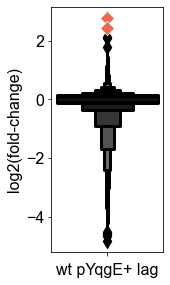

In [11]:
combined = pd.read_csv('source_data/included/fig4_CRISPRi_enrichment.txt',sep='\t',index_col=0)
wt_YqgE_lag = ['SBC309_vs_SBC308','SBC313_vs_SBC312']

fig,ax = plt.subplots(figsize=(2,4.5))
data = combined.loc[combined['strand']=='a',['enrichment_' + c for c in wt_YqgE_lag]].mean(axis=1)
sns.boxenplot(y=data, color='k',ax=ax)
outliers = data[(data > 2.4)]
sns.scatterplot(y=outliers, x=0, marker='D', color='#F2644B', ax=ax)

ax.set_ylabel('log2(fold-change)',size=16)
ax.set_xlabel('wt pYqgE+ lag',size=16)

plt.savefig('figures/fig5e.pdf')

In [12]:
df = combined.loc[combined['strand']=='a',['LAGs','strand']]
df['log2fc'] = data
df.columns = ['gene','strand','avg_log2fc']
df.sort_values('avg_log2fc',ascending=False).to_csv('source_data/source_tables/fig5e.csv',index=False)

MannwhitneyuResult(statistic=1.0, pvalue=0.00411950941286232)
MannwhitneyuResult(statistic=0.0, pvalue=0.0025374340489701264)
MannwhitneyuResult(statistic=0.0, pvalue=0.0025374340489701264)
MannwhitneyuResult(statistic=8.0, pvalue=0.06410263751519574)
MannwhitneyuResult(statistic=2.0, pvalue=0.0065326133822129805)
MannwhitneyuResult(statistic=2.0, pvalue=0.0065326133822129805)
MannwhitneyuResult(statistic=0.0, pvalue=0.00405655863278289)
MannwhitneyuResult(statistic=0.0, pvalue=0.00405655863278289)
MannwhitneyuResult(statistic=0.0, pvalue=0.00405655863278289)


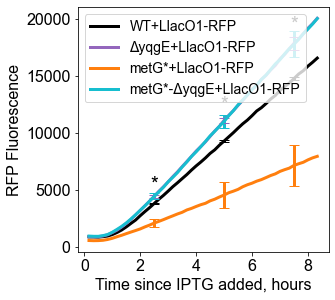

In [13]:
table = pd.read_csv('source_data/included/fig5_stationary_yqgE_RFP.csv',sep=',',index_col=0)
fig,ax = plt.subplots(figsize=(4.5,4.5))
x = table.index
colors = ['k',cm(8),cm(2),cm(18)]
s = 0
for sample,sample_name in zip(['MG1655_n','MG1655-ΔyqgE','metG_n','metG-ΔyqgE'],['WT+LlacO1-RFP','ΔyqgE+LlacO1-RFP','metG*+LlacO1-RFP','metG*-ΔyqgE+LlacO1-RFP']):   
    y = table.loc[:,table.columns.str.contains(sample)].mean(axis=1)
    #print(len(table.loc[:,table.columns.str.contains(sample)].columns))
    n = len(table.loc[:,table.columns.str.contains(sample)].columns)
    dev = table.loc[:,table.columns.str.contains(sample)].std(axis=1)/np.sqrt(n)
    ax.plot(x,y,color=colors[s],label=sample_name)
    error_bars = [2.5,5,7.5]
    ax.errorbar(error_bars,y.loc[error_bars],yerr=dev.loc[error_bars],capsize=5,linestyle='none',color=colors[s])
    for i in range(0,n):
        y = table.loc[:,table.columns.str.contains(sample)].iloc[:,i]
        y = y.iloc[[0,5,10,15,20,25,30,35,40,45,49]]
    s += 1
ax.legend(prop={'size': 14})
ax.text(2.5,5000,'*',size=20,ha='center')
ax.text(5,12000,'*',size=20,ha='center')
ax.text(7.5,19000,'*',size=20,ha='center')
ax.set_ylabel('RFP Fluorescence',size=16)
ax.set_xlabel('Time since IPTG added, hours',size=16)
plt.savefig('figures/fig5f.pdf')

for t in [2.5,5,7.5]:
    s1 = 'MG1655_n'
    s2 = 'MG1655-ΔyqgE'
    print(st.mannwhitneyu(table.loc[t,table.columns.str.contains(s1)],table.loc[t,table.columns.str.contains(s2)]))
for t in [2.5,5,7.5]:
    s1 = 'MG1655_n'
    s2 = 'metG-ΔyqgE'
    print(st.mannwhitneyu(table.loc[t,table.columns.str.contains(s1)],table.loc[t,table.columns.str.contains(s2)]))
for t in [2.5,5,7.5]:
    s1 = 'MG1655_n'
    s2 = 'metG_n'
    print(st.mannwhitneyu(table.loc[t,table.columns.str.contains(s1)],table.loc[t,table.columns.str.contains(s2)]))

In [14]:
all_df = pd.DataFrame()
for sample,sample_name in zip(['MG1655_n','MG1655-ΔyqgE','metG_n','metG-ΔyqgE'],['WT+LlacO1-RFP','ΔyqgE+LlacO1-RFP','metG*+LlacO1-RFP','metG*-ΔyqgE+LlacO1-RFP']):   
    df = table.loc[:,table.columns.str.contains(sample)]
    df.columns = df.columns.str.replace(sample,sample_name)
    all_df = all_df.merge(df,left_index=True,right_index=True,how='outer')
all_df.to_csv('source_data/source_tables/fig5f.csv')